# Resumen Ejecutivo
Durante el proceso de revisión de los informes de práctica del DISC (Departamento de Ingeniería de Sistemas y Computación), se requiere una inversión considerable de tiempo que, hasta la fecha, no ha sido automatizada. Esto conlleva largas jornadas de trabajo y carga adicional para los académicos, quienes podrían emplear ese tiempo en otras labores. Por lo tanto, como equipo de trabajo, hemos llegado a un consenso en la necesidad de llevar a cabo el análisis y desarrollo de un modelo que permita clasificar los informes en las categorías definidas en la rúbrica actual (insatisfactorio, regular, bueno y excelente).
Es importante destacar que, con la llegada de la pandemia, la entrega de informes ha sido en formato digital, lo que ha generado un conjunto de aproximadamente 100 informes disponibles. Esta digitalización ofrece ventajas significativas para el entrenamiento del modelo, ya que se dispone de datos de entrada y resultados concretos (informe, rúbrica y nota).


In [1]:
import fitz
import pandas as pd

# Lectura de datos


In [2]:
def get_classification(grade, number=False):
  classification = [0,0,0] # Regular, Bueno, Excelente (Todo 0 = Insatisfactorio)
  grade = round(grade, 1)
  if(grade < 4):
    return "insatisfactorio" if not number else 0
  elif (4 <= grade < 5.5):
    classification[0] = 1
    return "regular" if not number else 1
  elif (5.5 <= grade < 6.5):
    classification[1] = 1
    return "bueno" if not number else 2
  elif (6.5 <= grade <= 7):
    classification[2] = 1
    return "excelente" if not number else 3

In [3]:
dataset = pd.read_excel("calificaciones.xlsx", decimal=',')
grades_columns = dataset.columns.difference(["id", "periodo", "Unnamed: 9"]) #["estructura", "escritura", "contenido", "conclusiones", "conocimiento", "relevancia", "total"]
rubric_columns = grades_columns.difference(["total"]) #, "escritura", "estructura"
dataset = dataset.dropna(subset=grades_columns)

# Extracción y limpieza de documentos
En esta sección, se cargan los documentos en formato PDF, para la extracción y limpieza de estos, seguido de su integración al dataset.

In [4]:
documents = []

for id in dataset['id']:
    pdf_file = fitz.open(f"dataset/{id}.pdf")
    document_text = chr(12).join([page.get_text() for page in pdf_file])
    documents.append(document_text)
dataset.insert(loc=2, column="documents", value=documents)
dataset

id periodo                                          documents  \
0    20908397-1  2023-1   \n  \nUNIVERSIDAD CATÓLICA DEL NORTE  \nFACUL...   
1    18971994-1  2023-1   \nAntofagasta \n \n           Abril de 2023 \...   
2    19445943-1  2023-1   \n1 \n \n \nUNIVERSIDAD CATÓLICA DEL NORTE \n...   
5    19463712-1  2023-1   \n \n \n \n                                  ...   
6    20218430-1  2023-1   \nUNIVERSIDAD CATÓLICA DEL NORTE \nFACULTAD D...   
..          ...     ...                                                ...   
177  19928371-1  2021-1   \nUNIVERSIDAD CATÓLICA DEL NORTE \nFACULTAD D...   
178  19952605-1  2021-1   \n \n \n \nUNIVERSIDAD CATÓLICA DEL NORTE \nF...   
179  19957163-1  2021-1   \n \nUNIVERSIDAD CATÓLICA DEL NORTE \nFACULTA...   
180  20180533-1  2021-1   \nUNIVERSIDAD CATÓLICA DEL NORTE \nFACULTAD D...   
181  20408302-1  2021-1   \ni \n \nx \n \nUNIVERSIDAD CATÓLICA DEL NORT...   

     estructura  escritura  contenido  conclusiones  conocimiento  relevancia  \
0           6.2        5.1        6.0           5.5           4.4         6.0   
1           6.9        6.8        6.8           6.8           7.0         6.9   
2           6.7        6.9        6.5           6.4           6.8         7.0   
5           4.4        4.9        4.9           5.8           4.0         6.0   
6           6.1        5.8        5.5           5.0           4.5         5.8   
..          ...        ...        ...           ...           ...         ...   
177         6.8        6.2        6.0           5.7           6.3         6.0   
178         7.0        6.8        6.8           7.0           7.0         7.0   
179         6.5        4.5        5.8           5.5           6.4         6.3   
180         7.0        6.0        6.7           6.8           6.8         7.0   
181         6.5        5.0        6.0           6.5           6.5         6.5   

     total Unnamed: 9  
0      5.3        NaN  
1      6.9        NaN  
2      6.7        NaN  
5      4.9        NaN  
6      5.2        NaN  
..     ...        ...  
177    6.1        NaN  
178    6.9        NaN  
179    5.8        NaN  
180    6.7        NaN  
181    6.2        NaN  

[174 rows x 11 columns]

## David Sandbox :)

## Visualization

In [51]:
import matplotlib.pyplot as plt

vdf = dataset.copy()

ESTRUCTURA_COLUMN = 'estructura'
ESCRITURA_COLUMN = 'escritura'
CONTENIDO_COLUMN = 'contenido'
CONCLUSIONES_COLUMN = 'conclusiones'
CONOCIMIENTO_COLUMN = 'conocimiento'
RELEVANCIA_COLUMN = 'relevancia'
TOTAL_COLUMN = 'total'
PERIODO_COLUMN = 'periodo'
ID_COLUMN = 'id'

In [41]:
# Discarding periodo where 2022-1R is present

# copy_df = vdf[dataset['periodo'] != '2022-1R']
# copy_df = copy_df[copy_df['periodo'] != '2020-2R']

### Scatter plot Total vs id

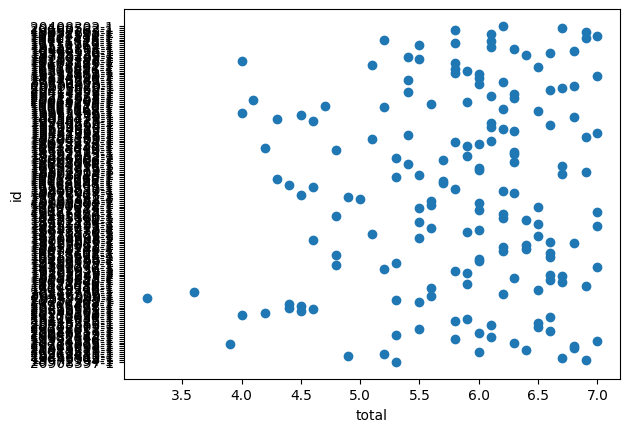

In [42]:
plt.scatter(vdf[TOTAL_COLUMN], vdf[ID_COLUMN])
plt.xlabel(TOTAL_COLUMN)
plt.ylabel(ID_COLUMN)
plt.show()

### ScatterPlot Periodo vs id

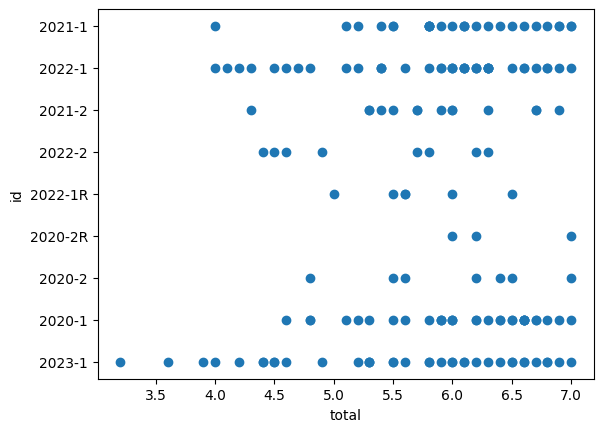

In [43]:
plt.scatter(vdf[TOTAL_COLUMN], vdf[PERIODO_COLUMN])
plt.xlabel(TOTAL_COLUMN)
plt.ylabel(ID_COLUMN)
plt.show()

### HeatMap total vs periodo

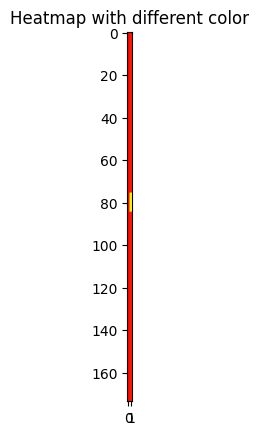

In [55]:
def replace_period(value):
    replacement_dict = {'2021-1': 20211,
                        '2021-2': 20212,
                        '2022-1': 20221,
                        '2022-2': 20222,
                        '2020-1': 20201,
                        '2020-2': 20202,
                        '2023-1': 20231,
                        '2022-1R': 202215,
                        '2020-2R': 202015
                        }
    return replacement_dict.get(value, value)
hmap_vdf = vdf.copy()
hmap_vdf[PERIODO_COLUMN] = hmap_vdf[PERIODO_COLUMN].apply(replace_period)
sub_set = hmap_vdf[['total', 'periodo']].to_numpy()
plt.imshow(sub_set, cmap='autumn')
plt.title("Heatmap with different color")
#FIXME: Fix display
plt.show()

### Points by Item 

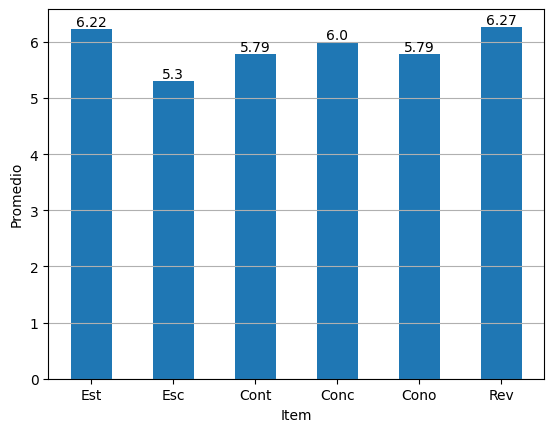

In [9]:
# Calculate the mean of estructura column in vdf
mean_estructura = vdf[ESTRUCTURA_COLUMN].mean()
mean_escritura = vdf[ESCRITURA_COLUMN].mean()
mean_contenido = vdf[CONTENIDO_COLUMN].mean()
mean_conclusiones = vdf[CONCLUSIONES_COLUMN].mean()
mean_conocimiento = vdf[CONOCIMIENTO_COLUMN].mean()
mean_relevancia = vdf[RELEVANCIA_COLUMN].mean()
data = {
    'Est': mean_estructura,
    'Esc': mean_escritura,
    'Cont': mean_contenido,
    'Conc': mean_conclusiones,
    'Cono': mean_conocimiento,
    'Rev': mean_relevancia
}

for key, value in data.items():
    plt.text(key, value, str(round(value, 2)), ha = 'center', va = 'bottom')

plt.bar(data.keys(), data.values(), width=0.5, )
plt.xlabel('Item')
plt.ylabel('Promedio')
plt.grid(axis="y")
plt.show()

In [ ]:
### Points by Item

In [10]:
def get_month_by_number(number: int):
    months = ["enero","febrero","marzo","abril","mayo","junio","julio","agosto","septiembre","octubre","noviembre","diciembre"]
    return months[number]

months_amount: int = 11


def get_date_start_index_from_document(document: str):
    for i in range(months_amount):
        index: int = document.find(get_month_by_number(i))
        if index != -1:
            return index
    return -1


def get_date_from_document(document: str):
    result: int = get_date_start_index_from_document(document)
    if result != -1:
        return True
    return False

safe_number_provider = 20 # Actually could be not safe

In [11]:
"""# Used for testing purposes, should be safe deleted
haveDate: list = []
for i in range(safe_number_provider):
    result: bool = get_date_from_document(dataset.iloc[i, 2])
    haveDate.append({result, str(i)})
    
    front_pages = []
for i in range(safe_number_provider):
    document: str = dataset.iloc[i,2]
    result: int = get_date_start_index_from_document(document)
    front_pages.append(result)
"""

'# Used for testing purposes, should be safe deleted\nhaveDate: list = []\nfor i in range(safe_number_provider):\n    result: bool = get_date_from_document(dataset.iloc[i, 2])\n    haveDate.append({result, str(i)})\n    \n    front_pages = []\nfor i in range(safe_number_provider):\n    document: str = dataset.iloc[i,2]\n    result: int = get_date_start_index_from_document(document)\n    front_pages.append(result)\n'

In [12]:
"""
id = "19104209-1"
doc = fitz.open(f"dataset/{id}.pdf")
page = doc[1]
words = page.get_text("words", sort=True)
for i, word in enumerate(words):
    text = word[4]
    print(text)
"""

max_block_value = 0
max_page_value = 0
for id in dataset['id']:
    doc = fitz.open(f"dataset/{id}.pdf")
    values = []
    for page in doc:
        blocks: list = page.get_text("blocks")
        values.append([block[4] for block in blocks])
        display(values)
    for value in values:
        value_size = len(value)
        if value_size > max_block_value:
            max_block_value = value_size
    if len(values) > max_page_value:
        max_page_value = len(values)
    break    
max_block_value

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n']]

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

[[' \n  \n',
  'UNIVERSIDAD CATÓLICA DEL NORTE  \n',
  'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS  \n',
  'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y COMPUTACIÓN  \n',
  ' \n',
  '  \n',
  '  \n',
  '  \n',
  'Informe Práctica Pre Profesional I  \n',
  '  \n',
  '  \n',
  '  \n',
  '  \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  ' \n',
  'Antofagasta \n',
  'Marzo, 2023 \n',
  ' \n',
  '<image: DeviceRGB, width: 161, height: 172, bpc: 8>',
  'Nombre Alumno: Diego Alexi Aguilera \nVillanelo  \nRut: 20.908.397-3 \nCarrera: Ingeniería en Computación e \nInformática \nNivel: 7 \nNombre Empresa: UCN-LSA \nCiudad: Antofagasta \nFecha inicio: 3 enero 2023 \nFecha termino: 3 marzo 2023 \n'],
 ['ii \n \n',
  'Índice General \n',
  '        Página     \n',
  'Índice de Figuras ...................................................................................................................... iv \n',
  'Glosario ..................................................................

48

In [13]:
max_page_value

59

## Count the blocks of the entire dataset

In [14]:
total_values = []
normal_blocks = []
max_values_length = 0
for id in dataset['id']:
    doc = fitz.open(f"dataset/{id}.pdf")
    values = []
    for page in doc:
        blocks: list = page.get_text("blocks")
        flatten_values = []
        phrase = ""
        for block in blocks:
            normal_blocks.append(block[4])
            for element in block[4]:
                phrase = phrase + element
        values += [block[4] for block in blocks]
        total_values.append([block[4] for block in blocks])
    if len(values) > max_values_length:
        max_values_length = len(values)


In [15]:
max_values_length

1782

In [16]:
len(normal_blocks)

123858

In [17]:
len(total_values)

5876

In [18]:
max_value = -1
for value in total_values:
    if len(value) > max_value:
        max_value = len(value)
max_value

165

In [19]:
doc = fitz.open("dataset/18178688-1.pdf")
blocks: list = doc[9].get_text("blocks")

aaaa = [block[4] for block in blocks]
aaaa

[' \n \n \n',
 '3 \n \n',
 'II. \nTRABAJO REALIZADO  \n',
 ' \n',
 'Al comenzar la práctica se dio acceso a una carpeta situada en Google Drive la cual contenía \n',
 'la versión de Moodle 3.8.2, en la cual fue realizado el trabajo solicitado por la empresa. \n',
 'Se comenzó el proceso de investigación e implementación simultáneamente mediante el \n',
 'estudio de la documentación de la plataforma Moodle y con el apoyo de video tutoriales de \n',
 'cómo utilizar la herramienta con el objetivo de agilizar el procedimiento. \n',
 ' \n',
 '2.1.      Descripción de la Problemática (Moodle) \n',
 ' \n',
 'La principal problemática es que, debido a la situación actual en la que se encuentra el país, se \n',
 'redujo el índice de ventas de cursos de capacitación y arriendos de salas de clases. Por esto se \n',
 'realizó una investigación respecto a la metodología E-Learning y que herramienta gratuita \n',
 'ayudaría mejor a la implementación de esta metodología llegando a la conclusión de qu

In [20]:
non_repeated_values = []

for value in values:
    if value not in non_repeated_values:
        non_repeated_values.append(value)

# Removed because Keras use this as reserved Token
try:
    non_repeated_values.remove('')
except:
    pass

len(non_repeated_values)

500

In [21]:
import tensorflow as tf

max_features = len(non_repeated_values) + 2
max_len = None 


vectorize_layer = tf.keras.layers.TextVectorization(
 max_tokens=max_features,
 output_mode='int',
 output_sequence_length=max_len,
 vocabulary=non_repeated_values)

vectorize_layer.get_vocabulary(include_special_tokens=True)

['',
 '[UNK]',
 ' \n',
 'i \n',
 'x \n',
 'UNIVERSIDAD CATÓLICA DEL NORTE \n',
 'FACULTAD DE INGENIERÍA Y CIENCIAS GEOLÓGICAS \n',
 'DEPARTAMENTO DE INGENIERÍA DE SISTEMAS Y \n',
 'COMPUTACIÓN \n',
 'Informe de Práctica Pre-Profesional I \n',
 'Nombre Alumno: Franz Nicolás Cortez \n',
 'Olmedo \n',
 'Rut: 20.408.302-9 \n',
 'Carrera: Ingeniería en Computación e \n',
 'Informática \n',
 'Nivel: 6 \n',
 'Nombre Empresa: Alejandra Collado Zúñiga  \n',
 '       Corretaje Industrial EIRL \n',
 'Ciudad: Antofagasta (teletrabajo) \n',
 'Fecha Inicio: 21/01/2021 \n',
 'Fecha Termino: 26/03/2021 \n',
 'Antofagasta \n',
 'Abril, 2021 \n',
 '<image: DeviceRGB, width: 243, height: 243, bpc: 8>',
 'ii \n',
 'Índice General \n',
 'Índice de Figuras ................................................................................................................................. iv \n',
 'Nomenclatura.......................................................................................................